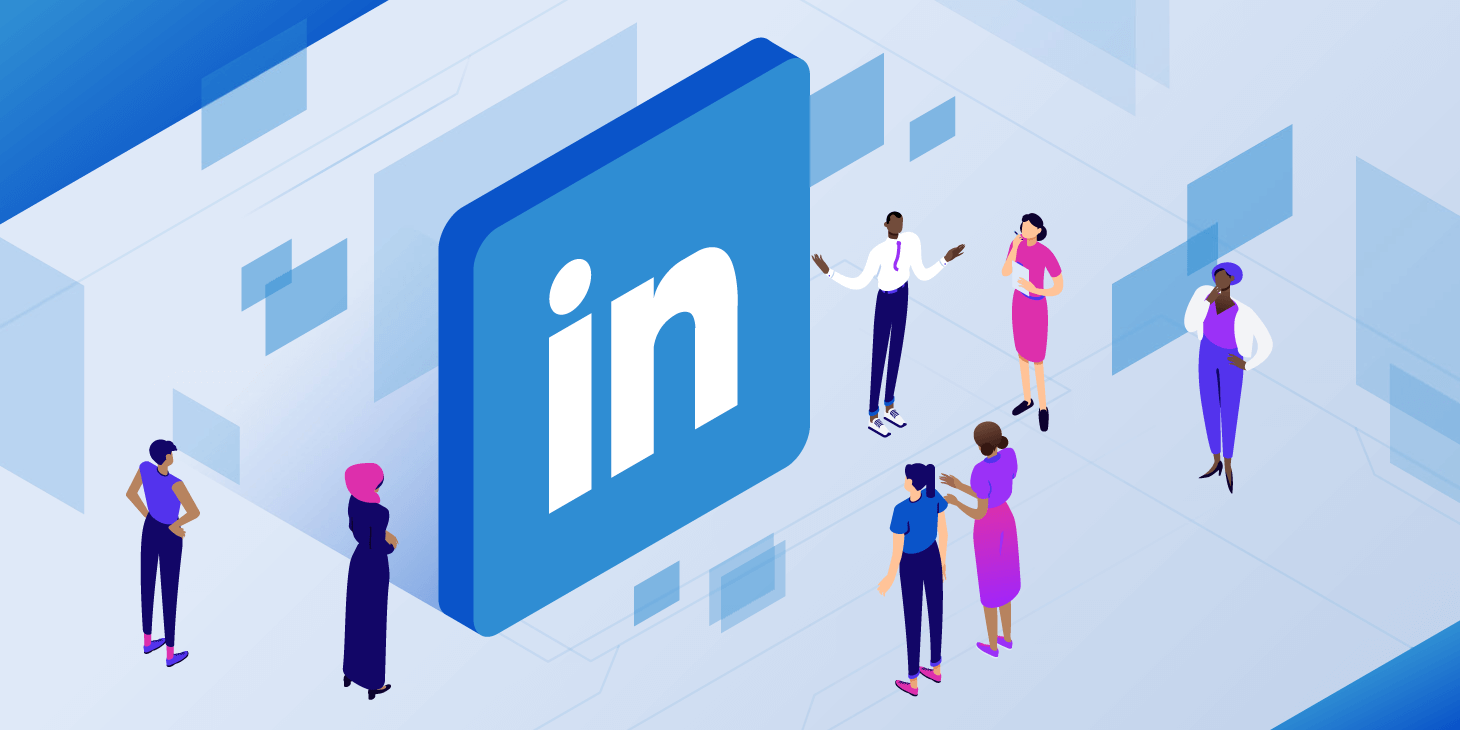

# Linked inSight
by **Meredith Wang** August-2022

<a href="#"><img align="left" alt="Python" src="https://img.shields.io/badge/Python-003F5D.svg?logo=python&logoColor=white"></a>
<a href="#"><img align="left" alt="Pandas" src="https://img.shields.io/badge/Pandas-00527C.svg?logo=pandas&logoColor=white"></a>
<a href="#"><img align="left" alt="NumPy" src="https://img.shields.io/badge/Numpy-00609C.svg?logo=numpy&logoColor=white"></a>
<a href="#"><img align="left" alt="SciPy" src="https://img.shields.io/badge/SciPy-1560bd.svg?logo=scipy&logoColor=white"></a>
<a href="#"><img align="left" alt="Matplotlib" src="https://img.shields.io/badge/Matplotlib-006DB2.svg?logo=python-matplotlib&logoColor=white"></a>
<a href="#"><img align="left" alt="Selenium" src="https://img.shields.io/badge/Selenium-1faecf.svg?logo=selenium&logoColor=white"></a>
<a href="#"><img align="left" alt="seaborn" src="https://img.shields.io/badge/seaborn-4E97D1.svg?logo=pandas&logoColor=white"></a>
<a href="#"><img align="left" alt="plotly" src="https://img.shields.io/badge/plotly-7BB4E3.svg?logo=plotly&logoColor=white"></a>
<a href="#"><img align="left" alt="sklearn" src="https://img.shields.io/badge/sklearn-A3CEEF.svg?logo=scikitlearn&logoColor=white"></a>
<a href="#"><img align="left" alt="NLTK" src="https://img.shields.io/badge/NLTK-C5D4EB.svg?logo=python-nltk&logoColor=white"></a>

<h1 align="center">------------ 📃 Project Description ------------</h1>

**Job hunting** is a tedious and stressful process. Stacked paragraphs of description and long list of requirement from the job listings are only adding fuel to the flame. This project aims to help me and other aspiring **data science** professionals get a clear insight on the role they're pursuing, and to provide a better understanding on the education level of their competitors.

<h1 align="center">------------ 🏘️ Project Goal ------------</h1>

▪️ Analyze data-science job postings on Linkedin using **Natural Language Processing** techniques

▪️ Predict the candidate's **education level**

Education level is classified into two categories:

- <span style="color: blue">Undergraduate</span> (candidate whose highest education level is a Bachelor degree, and those who have 'other' degrees)
- <span style="color: blue">Graduate</span> (candidate whose highest education level is Master/PhD)

<h1 align="center">------------ 📝 Initial Questions ------------</h1>

▪️ What does overall candidate's education distribution look like?

▪️ Is role dependent on the education level of candidates?

▪️ Is job level dependent on the education level of candidates?

▪️ Is job description different for graduate vs. undergraduate group?

<h1 align="center">------------ 📚 Data Dictionary ------------</h1>

| **Variable** | **Value**                    | **Meaning**                                                     |
|:-------------|:-----------------------------|:----------------------------------------------------------------|
| <span style="background-color: #ffe0bd">Link</span>         | String                       | The url of the job posting                                      |
| <span style="background-color: #ffe0bd">Company</span>      | String                       | The company name of the job posting                             |
| <span style="background-color: #ffe0bd">Mode</span>         | On-Site; Remote; Hybrid      | The working environment of the job posting                      |
| <span style="background-color: #ffe0bd">Type</span>         | Full-time; Contract          | The contract type of the job posting                            |
| <span style="background-color: #ffe0bd">Level</span>        | Entry; Associate; Mid-Senior | The job level of the job posting                                |
| <span style="background-color: #ffe0bd">Requirements</span> | String                       | The requirements in the description section of the job posting  |
| <span style="background-color: #ffe0bd">Edu Level</span>    | Int                          | Percentage of education level of candidates of the job position |
| <span style="background-color: #ffe0bd">Skills</span>       | String                       | The top 10 skills from candidates of job posting                |


<h1 align="center">------------ 🧮 Wrangle Linkedin Data ------------</h1>

## 1. Data Acquisition
Data is acquired through Linkedin job search automation with Selenium. It iterates through search results in the data science field and returns job posting's *url link*, *company name*, *location*, *role name*, *job level*, *mode*, *description*, *candidate's education level* and *top skills* (Linkedin premium insight, this data is only available when there's enough applicants).

In [1]:
# Import essential libraries
from imports import *
# Import data acquisiton function
from acquire import get_data
# Import data preparation functions
from prepare import prep_data, basic_clean, lemmatize, remove_stopwords, split, clean, clean_skills
# Import visual functions
import plot
# Set up display format
pd.options.display.float_format = '{:,.3f}'.format

In [2]:
# Calling the acquire function to get data
df = get_data()

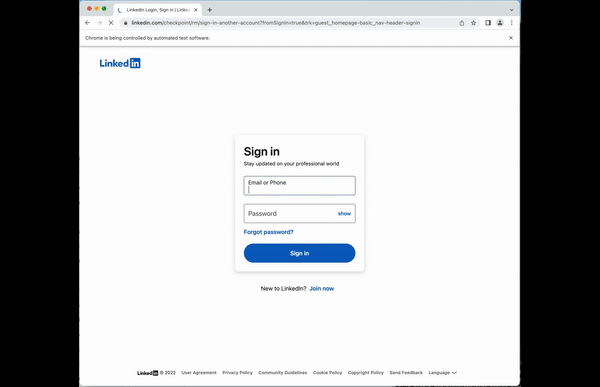

## 2. Data Preparation - Data Cleaning 🧹 
▪️ **Missing Values (NaN):**
Most NaN occur at the description section and candidate's information. These are filled manually by using the job url to search similar job posting either at the same company or same job title and level at other comparable companies.
▪️ **Rename Columns**
- Ensure all columns have meaningful and short names

▪️ **Data Mapping:**
- Created new column `label` based on the percentage of (`edu_bachelors` + `edu_other`) and (`edu_master` + `edu_phd`)

▪️ **Dummy variables**
- Create dummy variables for categorical variables

- Contatenate dummy variables onto original dataframe

▪️ **Initial Text Cleaning**
Job role names vary from companies. For example, for data scientist position, there are names like "Data Scientist II", "Data Scientist, Charging Data and Modeling", "Data Scientist - Credit Card", etc... For the purpose of analyzing the general category's relationship with the target variable, all roles are generalized to 4 categories: Data Scientist, Data Analyst, Data Engineer, Managerial Roles.

▪️ **Parsing Text**
- Convert text to all lower case for normalcy

- Remove any accented characters, non-ASCII characters

- Remove special characters

- Lemmatization

- Remove stopwords

- Store the clean text and the original text for use in future notebooks.

In [3]:
# Cleaning the data using function from prepare.py
df = prep_data(df)

# Cleaning text columns using function from prepare.py
df.requirements = df.requirements.apply(clean)
df.skills = df.skills.apply(clean_skills)

## 3. Data Preparation - Splitting Data 🗂

In [4]:
# Split the data into train, validate, test using user-defined function from prepare.py
train, validate, test = split(df)
# Checking the size of each dataset
train.shape, validate.shape, test.shape

((135, 22), (59, 22), (49, 22))

<h1 align="center">------------ 📊 Data Context ------------</h1>

▪️ Less than 1/4 of data science jobs candidate's highest education level is Bachelor degrees.

▪️ Nearly 3/4 of data science jobs candidates have graduate degrees

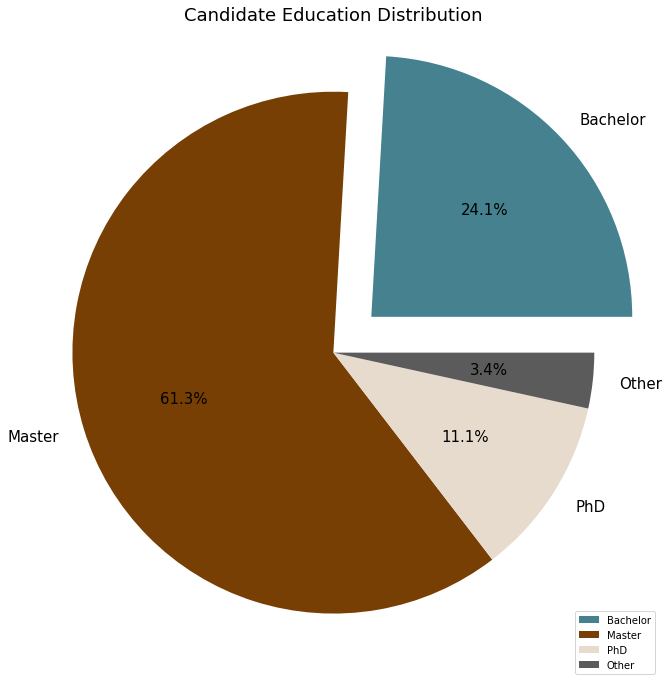

In [5]:
# Calling plot.py function to visualize overall education distribution
plot.overall_distribution(train)

<h1 align="center">------------ 👩🏻‍💻 Exploratory Analysis ------------</h1>

## Question 1: Is role dependent on the education level of candidates?

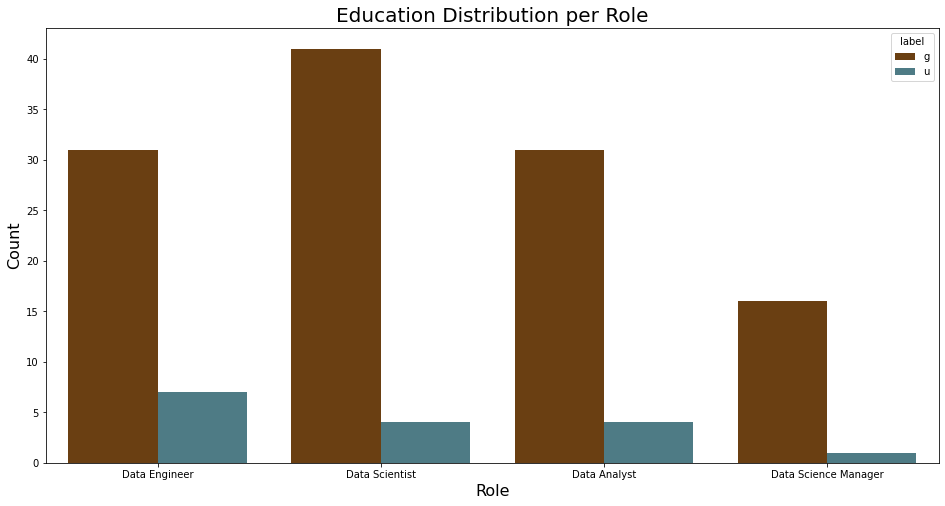

In [6]:
# Calling plot.py function to visualize education distribution per role
plot.role(train)

#### Statical Testing - Chi$^2$ ($\chi^2$) Test
- $H_0$ Job title/role is independent on candidates education distribution
- $H_a$ Job title/role is dependent on candidates education distribution

In [7]:
# Creating contingency table
observed = pd.crosstab(train.role, train.label)
# Set alpha
alpha = 0.05
# Conduct chi^2 test
chi2, p, dof, expected = stats.chi2_contingency(observed)
# Conclude hypothesis
if p < alpha:
    print("We reject the hypothesis that Job title/role is independent on candidates education distribution")
else:
    print(Fore.BLUE+"We fail to reject the null hypothesis")

We fail to reject the null hypothesis


## Answer 1:
**Visually, there is a difference in distribution but the Chi$^2$ ($\chi^2$) Test failed to reject the hypothesis.**

***

## Question 2:  Is job level dependent on the education level of candidates?

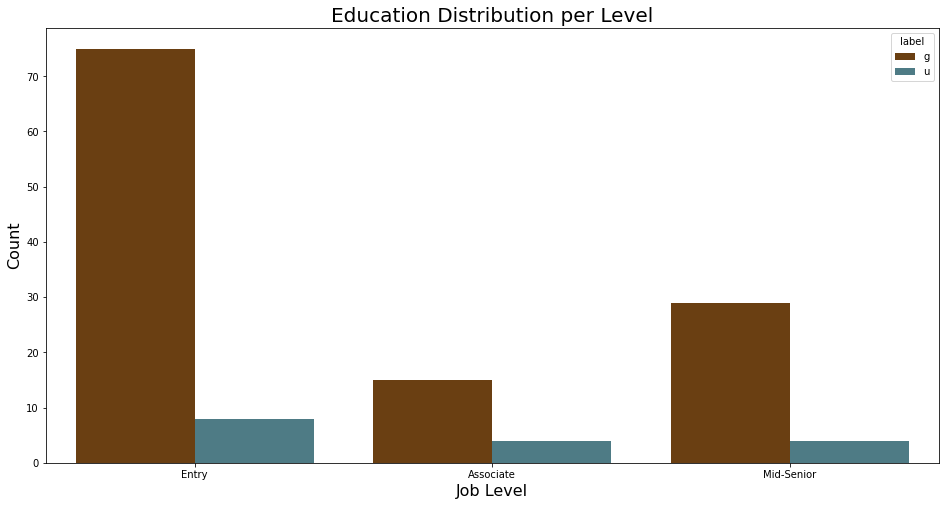

In [8]:
# Calling plot.py function to visualize education distribution per role
plot.level(train)

#### Statical Testing - Chi$^2$ ($\chi^2$) Test
- $H_0$ Job level is independent on candidates education distribution
- $H_a$ Job level is dependent on candidates education distribution

In [9]:
# Creating contingency table
observed = pd.crosstab(train.level, train.label)
# Set alpha
alpha = 0.05
# Conduct chi^2 test
chi2, p, dof, expected = stats.chi2_contingency(observed)
# Conclude hypothesis
if p < alpha:
    print("We reject the hypothesis that job level is independent on candidates education distribution")
else:
    print(Fore.BLUE+"We fail to reject the null hypothesis")

We fail to reject the null hypothesis


## Answer 2:
**Chi$^2$ ($\chi^2$) Test failed to reject the hypothesis. Job level is independent on education distribution.**

***

## Question 3: Is job description different for graduate vs. undergraduate group?

### Overall most frequent words in job descriptions

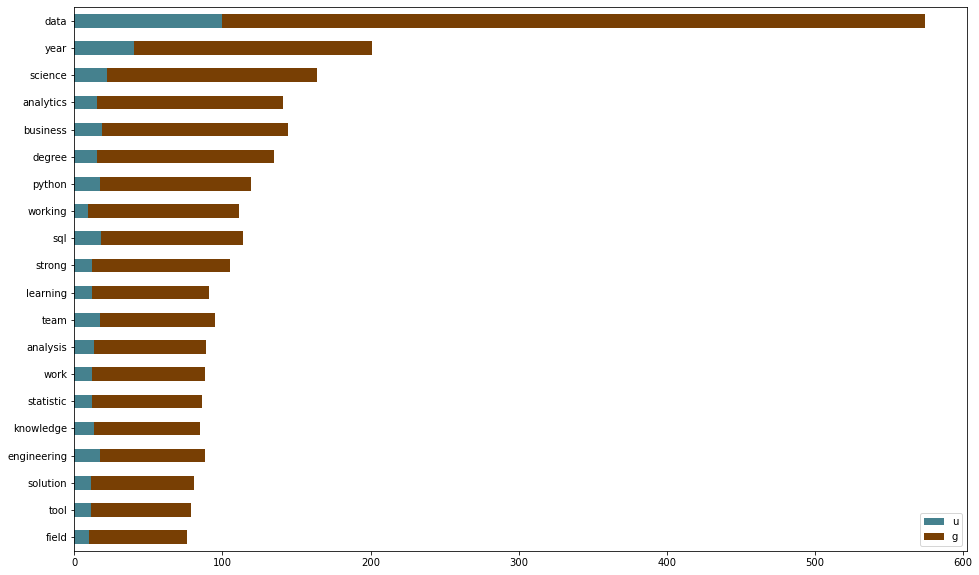

In [10]:
plot.requirements(train)

**When examining single words, the top 20 most frequent words are not very telling. Both labels follow similar patterns.**

### Most frequent bigrams for graduate degree dominant job postings

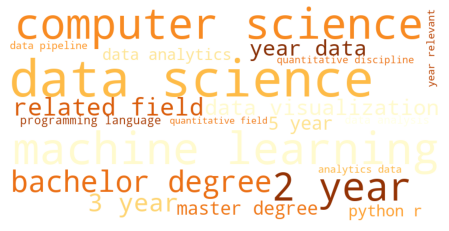

In [11]:
plot.g_bigrams(train)

### Most frequent bigrams for undergraduate degree dominant job postings

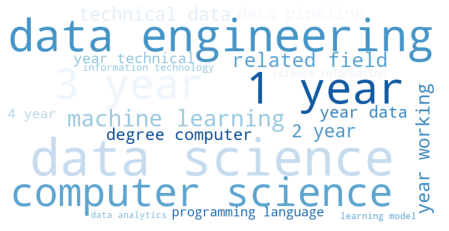

In [12]:
plot.u_bigrams(train)

## Answer 3:
From the bigram analysis, we can see the importance of requirements (the size of bigrams) is different. For graduate degrees, we see **'computer science'**, **'bachelor degree'**,**'master degree'**, **'related field'** which frequently appear as 'Bachelor/Master degree in computer science or STEM related field in the job requirements.
The number of years in two categories is different. We see 2,3,5 years on the graduate side, and 1, 3 on the undergraduate side.

***

## Question 4: Are top skills different for graduate vs. undergraduate group?

### Most frequent skills from graduate degree dominant job postings

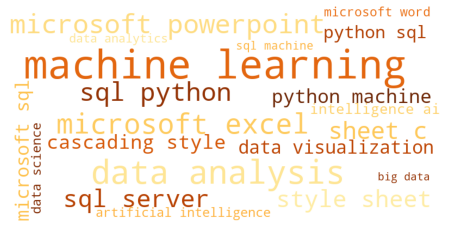

In [13]:
plot.g_skills(train)

### Most frequent skills from undergraduate degree dominant job postings

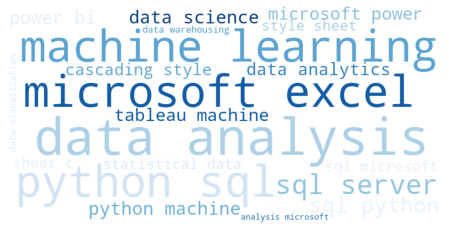

In [14]:
plot.u_skills(train)